# Preprocess Sample Images

In [276]:
from scipy import misc
import subprocess as sp
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import math

In [235]:
%matplotlib inline

In [242]:
def preprocess_signatures(original_path_dir, save_path_dir=None, visualize=False):
    """
    
    Preprocess the signatures by converting all images to .png, and applying Otsu Thresholding 
    followed by Morphological Opening.
    
    Parameters:
    -----------
    
    original_path_dir: (string) path of directory containing original wikidata downloaded signatures
    
    save_path_dir: (string) path of directory where preprocessed signature images should be stored
    
    visualize: (bool) whether to visualize the output as subplots of original and preprocessed signatures
    
    """
    files = os.listdir(original_path_dir)
    for f in files:
        if not f.endswith(".png"):
            f2 = os.path.splitext(f)[0] + ".png"
            p = original_path_dir + os.path.sep + f
            p2 = original_path_dir + os.path.sep + f2
            sp.call(["convert", p, p2])
            sp.call(["rm", p])
            p = p2
        else:
            f2 = f
            p = original_path_dir + os.path.sep + f
        
        img = misc.imread(p, mode="L")
        ret, img_binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        img_opening = cv2.morphologyEx(img_binary, cv2.MORPH_OPEN, (3, 3))
        
        if save_path_dir is not None:
            p3 = save_path_dir + os.path.sep + f2
            misc.imsave(p3, img_opening)
        
        if visualize:
            plt.subplot(1, 2, 1)
            plt.imshow(img, cmap="gray")
            plt.axis("off")
            plt.title("Original")
            plt.subplot(1, 2, 2)
            plt.imshow(img_opening, cmap="gray")
            plt.axis('off')
            plt.title("Preprocessed")
            plt.suptitle(os.path.splitext(f)[0])
            plt.show()

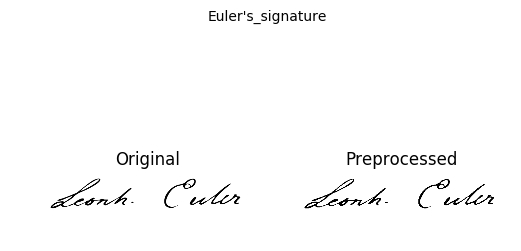

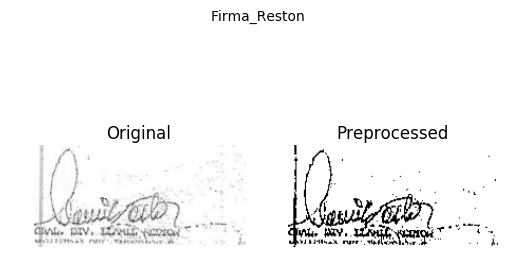

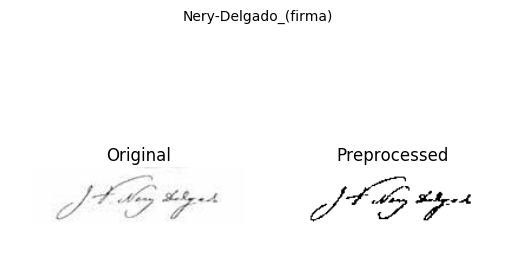

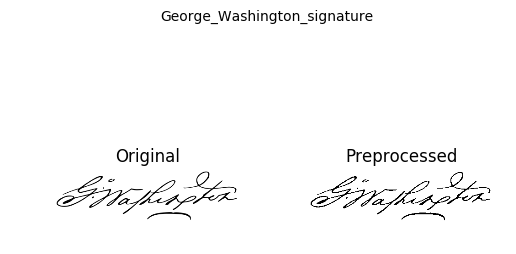

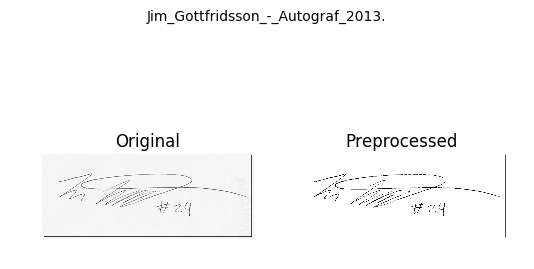

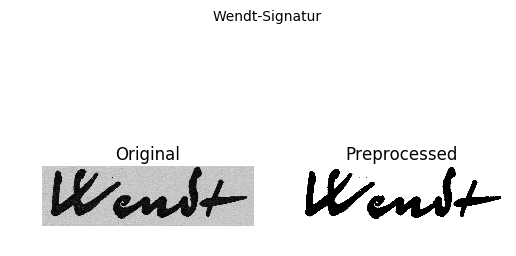

In [248]:
original_path_dir = "./signatures_images/original/"
preprocessed_path_dir = "./signatures_images/preprocessed/"
preprocess_signatures(original_path_dir, 
                      save_path_dir=preprocessed_path_dir, 
                      visualize=True)

In [297]:
def resize_preprocessed_images(preprocessed_path_dir, visualize=False):
    """
    
    Resize all images to the size of the image with the maximum size. It replaces the 
    original preprocessed images with the new resized ones.
    
    Parameters:
    -----------
    
    preprocessed_path_dir: (string) path to the directory containing preprocessed images
    
    visualize: (bool) whether to show final preprocessed images while processing
    
    """
    
    files = os.listdir(preprocessed_path_dir)
    max_width = 0
    max_height = 0
    
    for f in files:
        p = preprocessed_path_dir + os.path.sep + f
        old_img = misc.imread(p, mode="L")
        width = old_img.shape[1]
        height = old_img.shape[0]
        if width > max_width:
            max_width = width
        if height > max_height:
            max_height = height
    
    for f in files:
        p = preprocessed_path_dir + os.path.sep + f
        old_img = misc.imread(p, mode="L")
        width = old_img.shape[1]
        height = old_img.shape[0]
        new_img = np.ones(shape=(max_height, max_width), dtype=old_img.dtype) * 255
        scale_height, scale_width = math.floor(1.0 * max_height / height), math.floor(1.0 * max_width / width) 
        height_to_width_ratio = height * 1.0 / width
        new_width = int(width * scale_width)
        new_height = int(height_to_width_ratio * new_width)
        scaled_img = cv2.resize(old_img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
        new_img[:new_height, :new_width] = scaled_img
        misc.imsave(p, new_img)
        
        if visualize:
            plt.imshow(new_img, cmap="gray")
            plt.xticks([])
            plt.yticks([])
            plt.show()

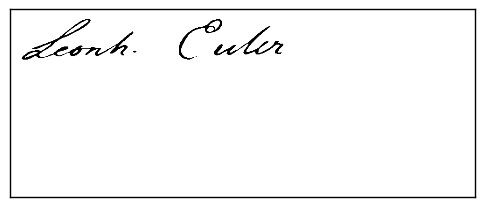

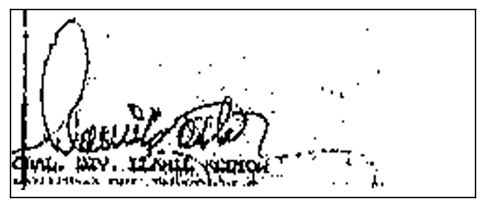

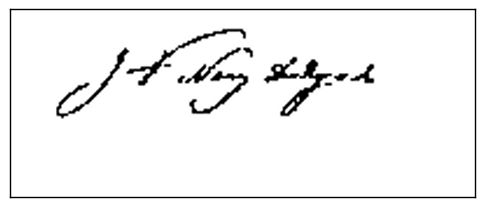

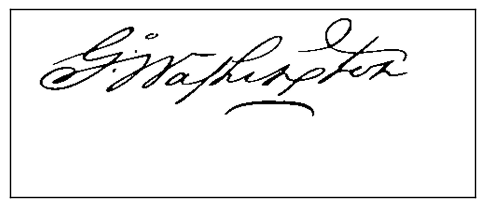

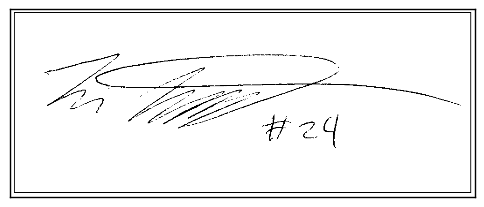

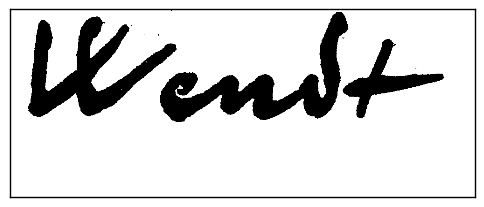

In [298]:
resize_preprocessed_images(preprocessed_path_dir, visualize=True)